### Visualize a section of trials for a session, with trial labeled with belief partitions for a feature

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import utils.behavioral_utils as behavioral_utils
import utils.spike_utils as spike_utils
import utils.io_utils as io_utils
import os
from distutils.util import strtobool

import argparse
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from constants.behavioral_constants import *

from scipy import stats


In [2]:
sub = "SA"
SESSIONS_PATH = "/data/patrick_res/sessions/{sub}/valid_sessions.pickle"
session = 20180802
feat = "TRIANGLE"
beh = behavioral_utils.get_valid_belief_beh_for_sub_sess(sub, session)
beh = behavioral_utils.get_belief_partitions(beh, feat)


In [3]:
beh.groupby("CurrentRule").BlockNumber.nunique()

CurrentRule
CIRCLE      6
CYAN        6
ESCHER      1
GREEN       6
MAGENTA     3
POLKADOT    4
RIPPLE      4
SQUARE      5
STAR        2
SWIRL       4
TRIANGLE    7
YELLOW      5
Name: BlockNumber, dtype: int64

In [4]:
beh[beh.CurrentRule == feat].BlockNumber.unique()


array([ 3, 11, 20, 25, 27, 35, 44])

In [5]:
sub_beh = beh[(beh.BlockNumber >=19) & (beh.BlockNumber < 28)]

In [6]:
sub_beh.groupby("CurrentRule").BlockNumber.nunique()

CurrentRule
CIRCLE      1
CYAN        1
GREEN       2
SQUARE      1
STAR        1
TRIANGLE    3
Name: BlockNumber, dtype: int64

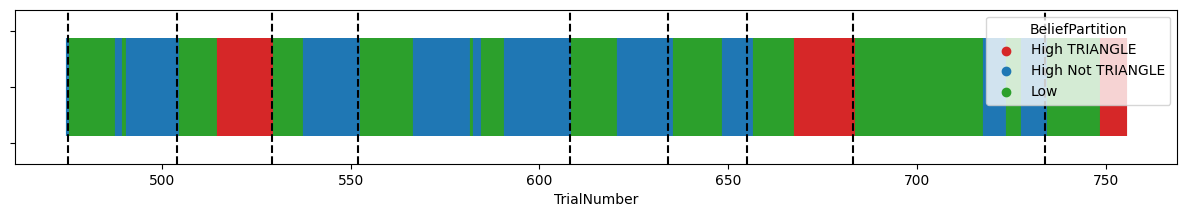

In [7]:
fig, ax= plt.subplots(figsize=(15, 2))
# order = ["Low", f"High Not {feat}", f"High {feat}"]
# colors = ["tab:green", "tab:blue", "tab:red"]

order = [f"High {feat}", f"High Not {feat}", "Low"]
colors = ["tab:red", "tab:blue", "tab:green"]
sns.scatterplot(
    sub_beh, x="TrialNumber", y=0.5, 
    hue="BeliefPartition", 
    hue_order=order,
    palette=colors,
    marker="|", edgecolor=None, s=5000, linewidth=3, 
    ax=ax)
# ax.set_ylim([0.499, 0.5])
ax.set_yticklabels([])

block_switches = sub_beh[sub_beh.TrialAfterRuleChange == 0]
for i, switch in block_switches.iterrows():
    ax.axvline(switch.TrialNumber, linestyle="--", color="black")

/tmp/ipykernel_2497182/1695402058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_beh["PrefProbNotTriangle"] = sub_beh[[f"{feat}Prob" for feat in FEATURES if feat != "TRIANGLE"]].max(axis=1)


<Axes: xlabel='PrefProbNotTriangle', ylabel='TRIANGLEProb'>

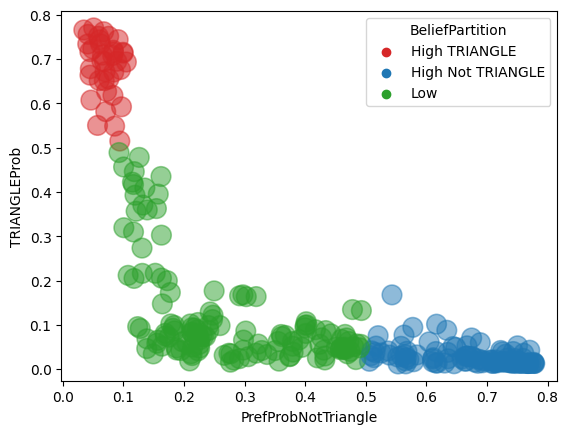

In [16]:
sub_beh["PrefProbNotTriangle"] = sub_beh[[f"{feat}Prob" for feat in FEATURES if feat != "TRIANGLE"]].max(axis=1)
sns.scatterplot(sub_beh, x="PrefProbNotTriangle", y="TRIANGLEProb", hue="BeliefPartition", hue_order=order, palette=colors, alpha=0.5, s=200, edgecolor=None)